## Taylor plot

In [1]:
try:
    import easy_mpl
except ModuleNotFoundError:
    !pip install git+https://github.com/Sara-Iftikhar/easy_mpl.git@19dcba30921d84a043df87283c7eb4dbfd906b6b

  Cloning https://github.com/Sara-Iftikhar/easy_mpl.git (to revision 19dcba30921d84a043df87283c7eb4dbfd906b6b) to /tmp/pip-req-build-h52as4nw
  Running command git clone --filter=blob:none --quiet https://github.com/Sara-Iftikhar/easy_mpl.git /tmp/pip-req-build-h52as4nw
  Running command git rev-parse -q --verify 'sha^19dcba30921d84a043df87283c7eb4dbfd906b6b'
  Running command git fetch -q https://github.com/Sara-Iftikhar/easy_mpl.git 19dcba30921d84a043df87283c7eb4dbfd906b6b
  Running command git checkout -q 19dcba30921d84a043df87283c7eb4dbfd906b6b
  Resolved https://github.com/Sara-Iftikhar/easy_mpl.git to commit 19dcba30921d84a043df87283c7eb4dbfd906b6b
  Preparing metadata (setup.py) ... done
  Created wheel for easy-mpl: filename=easy_mpl-0.21.4-py3-none-any.whl size=65965 sha256=2a4f51c0f7a61619e525407a01732227536c31679c81432f88571d0afc09e276
  Stored in directory: /root/.cache/pip/wheels/a9/63/17/5c6f08a6cd4cb81fdde3dfef3e66595c7013bf1b9ae603f191
Successfully built easy-mpl


In [22]:
import numpy as np
import pandas as pd
from easy_mpl import taylor_plot
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = '14'
plt.rcParams['xtick.labelsize'] = '12'
plt.rcParams['ytick.labelsize'] = '12'
plt.rcParams['axes.titlesize'] = '14'

from easy_mpl.utils import version_info

version_info()

{'easy_mpl': '0.21.4',
 'matplotlib': '3.7.1',
 'numpy': '1.23.5',
 'pandas': '1.5.3'}

In [23]:
bayes_test = pd.read_csv('bayes_test.csv')
bayes_train = pd.read_csv('bayes_train.csv')
ngb_test = pd.read_csv('ngb_test.csv')
ngb_train = pd.read_csv('ngb_train.csv')
probnn_test = pd.read_csv('probnn_test.csv')
probnn_train = pd.read_csv('probnn_train.csv')
probbnn_test = pd.read_csv('probnn_test.csv')
probbnn_train = pd.read_csv('probnn_train.csv')

In [24]:
print(np.testing.assert_array_almost_equal(bayes_test['true'].values, ngb_test['true'].values))
print(np.testing.assert_array_almost_equal(ngb_test['true'].values, probnn_test['true'].values))
print(np.testing.assert_array_almost_equal(probnn_test['true'].values, probbnn_test['true'].values))

print(np.testing.assert_array_almost_equal(bayes_train['true'].values, ngb_train['true'].values))
print(np.testing.assert_array_almost_equal(ngb_train['true'].values, probnn_train['true'].values))
print(np.testing.assert_array_almost_equal(probnn_train['true'].values, probbnn_train['true'].values))

None
None
None
None
None
None


In [25]:

train_true = bayes_train['true'].values
test_true = bayes_test['true'].values
train_pred_ngb = ngb_train['prediction'].values
test_pred_ngb = ngb_test['prediction'].values
train_pred_bayesian = bayes_train['prediction'].values
test_pred_bayesian = bayes_test['prediction'].values
train_pred_prob = probnn_train['prediction'].values
test_pred_prob = probnn_test['prediction'].values
train_pred_probbayes = probbnn_train['prediction'].values
test_pred_probbayes = probbnn_test['prediction'].values

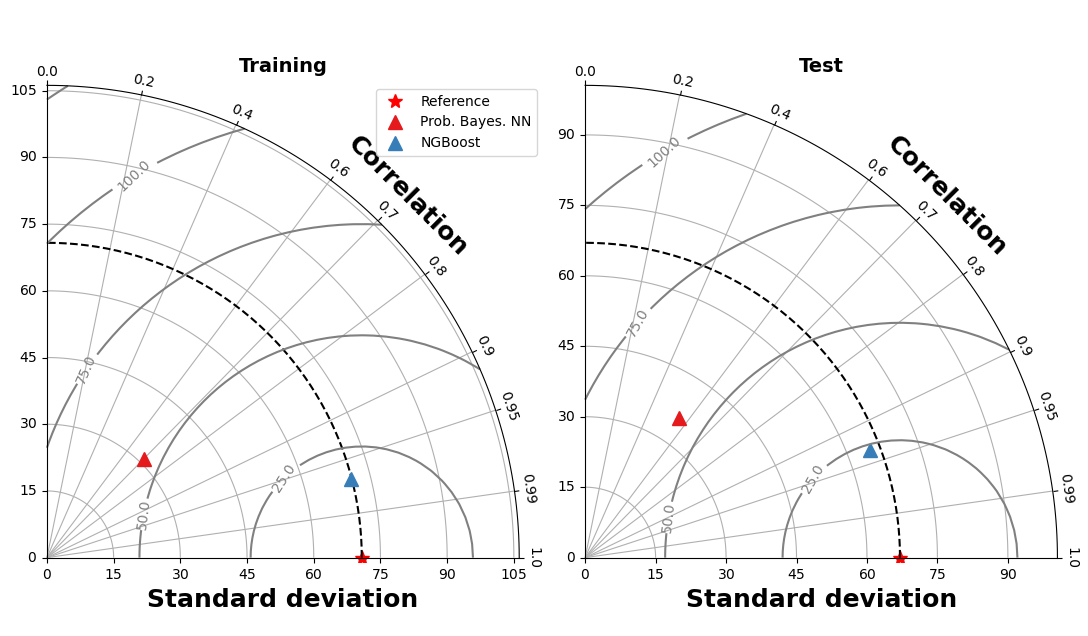

In [27]:
obs = {'Training': train_true,
       'Test': test_true}
sim = {'Training': {'Prob. Bayes. NN': train_pred_probbayes,
                 'NGBoost': train_pred_ngb},
       'Test': {'Prob. Bayes. NN': test_pred_probbayes,
                 'NGBoost': test_pred_ngb}}

##
RECTS = {'Training': 121,
         'Test': 122}

##
figure = taylor_plot(
    observations=obs,
    simulations=sim,
    plot_bias=True,
    show=False,
    axis_locs= RECTS,
    figsize =(11, 8),
    leg_kws={'bbox_to_anchor':(0.5, 0.79)})
plt.tight_layout()
plt.show()

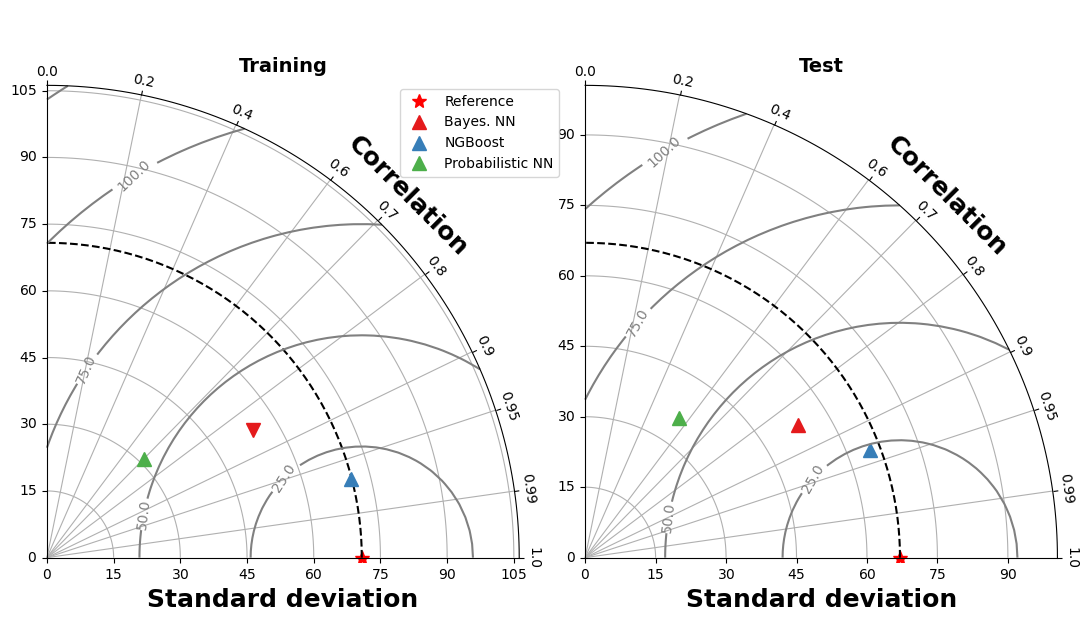

In [30]:

sim = {
    'Training': {
                'Bayes. NN': train_pred_bayesian,
                'NGBoost': train_pred_ngb,
                'Probabilistic NN': train_pred_prob
                },
    'Test': {
                'Bayes. NN': test_pred_bayesian,
                'NGBoost': test_pred_ngb,
                'Probabilistic NN': test_pred_prob
          }
       }

##
figure = taylor_plot(
    observations=obs,
    simulations=sim,
    plot_bias=True,
    show=False,
    axis_locs= RECTS,
    figsize =(11, 8),
    leg_kws={'bbox_to_anchor':(0.52, 0.79)})
plt.tight_layout()
plt.show()